
# **Partie 1 : Prise de main avec pandas**

---



# **Q1.2 Vérifier la sélection du GPU**

In [23]:
####################################""

# **Q1.4 Création de DataFrame**

In [24]:
import housing
import pandas as pd

# création d'un dictonnaire python de données suivants
data = {
    "id": [1, 2, 3, 4],
    "ville": ["Bruxelles", "Liège", "Namur", "Mons"],
    "population": [196828, 195778, 114042, 96358],
    "superficie_km2": [33.09, 68.65, 175.93, 147.56]
}

# le transformer en DataFrame
df = pd.DataFrame(data)

# **Q1.5 Exploration des statistiques**

In [25]:
df.head()

,id,ville,population,superficie_km2
0,1,Bruxelles,196828,33.09
1,2,Liège,195778,68.65
2,3,Namur,114042,175.93
3,4,Mons,96358,147.56


In [26]:
df.describe()

,id,population,superficie_km2
count,4.000000,4.000000,4.000000
mean,2.500000,150751.500000,106.307500
std,1.290994,53093.219237,66.653209
min,1.000000,96358.000000,33.090000
25%,1.750000,109621.000000,59.760000
50%,2.500000,154910.000000,108.105000
75%,3.250000,196040.500000,154.652500
max,4.000000,196828.000000,175.930000


# **Q1.6 Tri des données**

In [27]:
df_sorted_population = df.sort_values(by="population", ascending=False)

In [28]:
df_sorted_superficie = df.sort_values(by="superficie_km2", ascending=False)

# **Q1.7 Visualisation des données (A COMPLETER)**

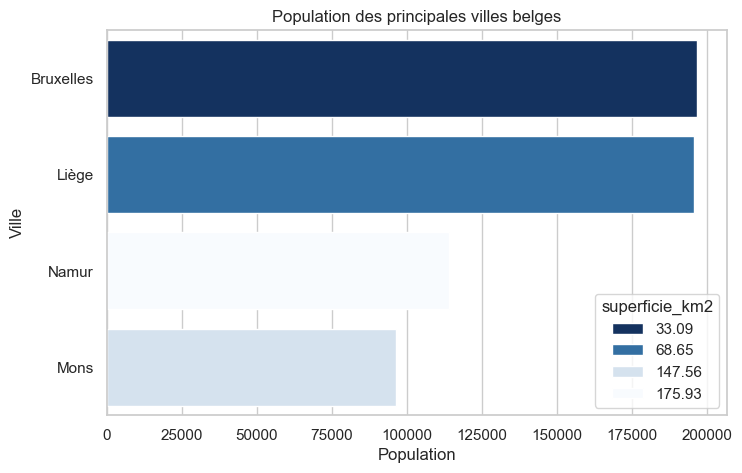

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style Seaborn
sns.set_theme(style="whitegrid")

# Tracer la population par ville
plt.figure(figsize=(8,5))
sns.barplot(x="population", y="ville", data=df_sorted_population, palette="Blues_r", hue="superficie_km2")
plt.xlabel("Population")
plt.ylabel("Ville")
plt.title("Population des principales villes belges")
plt.show()


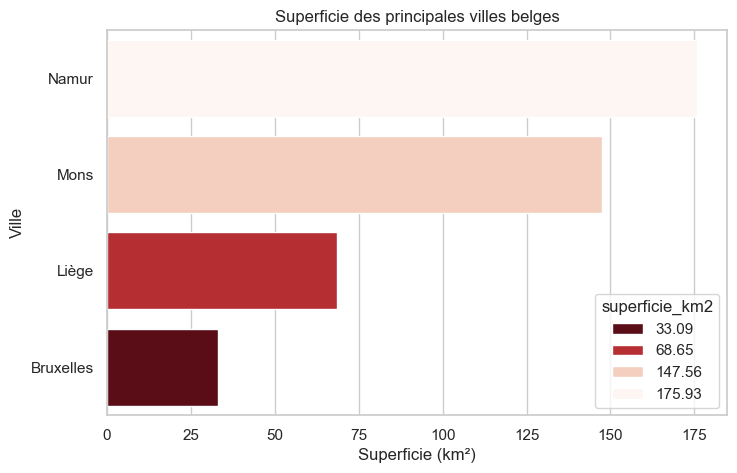

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y="ville", x="superficie_km2", data=df_sorted_superficie, palette="Reds_r", hue="superficie_km2")
plt.xlabel("Superficie (km²)")
plt.ylabel("Ville")
plt.title("Superficie des principales villes belges")
plt.show()

# **PARTIE 2: importation des librariries et chargement des données**


---




# **Q1 : Installer et importer les librairies Python (Sklearn, pandas, numpy...)**

In [ ]:
!python -m pip install folium
!python -m pip install branca

# **Q1 : Importation des librairies Python (Sklearn, pandas, numpy...)**

In [44]:
from IPython.display import display

In [40]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

# **Q2. Télécharger des données**

In [36]:
housing = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# **Q3. Vérifier la taille des données**

In [37]:
housing.shape

(17000, 9)

# **Q4. Afficher les 30 premières valeurs**

In [38]:
housing.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


# **Q5. Compléter la cellule pour vérifier la présence de valeurs nulles**


In [47]:
pre_values = pd.DataFrame(housing.isnull().sum())
display('Valeurs nulles avant suppression :', pre_values)
print('Taille avant suppression :', housing.shape)

housing_clean = housing.dropna()

post_values = pd.DataFrame(housing_clean.isnull().sum())
display('Valeurs nulles après suppression :', post_values)
print('Taille après suppression :', housing_clean.shape)

'Valeurs nulles avant suppression :'

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


Taille avant suppression : (17000, 9)


'Valeurs nulles après suppression'

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


Taille après suppression : (17000, 9)


# **Q7. Sélection des données d'apprentissage et calcul d'une nouvelle caractéristique (room_per_person)**



In [48]:
def preprocess_features(california_housing_dataframe):
    processed_features = california_housing_dataframe.copy()
    selected_features = ["latitude","longitude","housing_median_age","total_rooms",
     "total_bedrooms","population","households","median_income","rooms_per_person"]
   # Create a synthetic feature.
    processed_features["rooms_per_person"] = california_housing_dataframe["total_rooms"] / california_housing_dataframe["population"]
    return processed_features[selected_features]

In [49]:
df_processed_features = preprocess_features(housing)

# **Q8. Compléter la cellule pour définir des données cibles (targets (Y))**

In [52]:
def preprocess_targets(california_housing_dataframe):
    processed_data = california_housing_dataframe.copy()
    processed_data["median_house_value"] = processed_data["median_house_value"] / 1000
    return processed_data["median_house_value"]

In [53]:
df_processed_features["median_house_value"] = preprocess_targets(housing)

# **Q9. Sélectionner et diviser les données d'apprentissage**


In [57]:
training_examples = df_processed_features.head(12000)

# **Q10. Sélectionner les données de validation**


In [63]:
validation_examples = df_processed_features.tail(5000)

# **Q11. Visualiser les données sur la carte de la Californie**

In [64]:
def data_visualization(training_examples, validation_examples):
  plt.figure(figsize=(13, 8))
  ax = plt.subplot(1, 2, 1)
  ax.set_title("Validation Data")
  ax.set_autoscaley_on(False)
  ax.set_ylim([32, 43])
  ax.set_autoscalex_on(False)
  ax.set_xlim([-126, -112])
  plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_examples["median_house_value"] / validation_examples["median_house_value"].max())
  ax = plt.subplot(1,2,2)
  ax.set_title("Training Data")
  ax.set_autoscaley_on(False)
  ax.set_ylim([32, 43])
  ax.set_autoscalex_on(False)
  ax.set_xlim([-126, -112])
  plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_examples["median_house_value"] / training_examples["median_house_value"].max())
  _ = plt.plot()

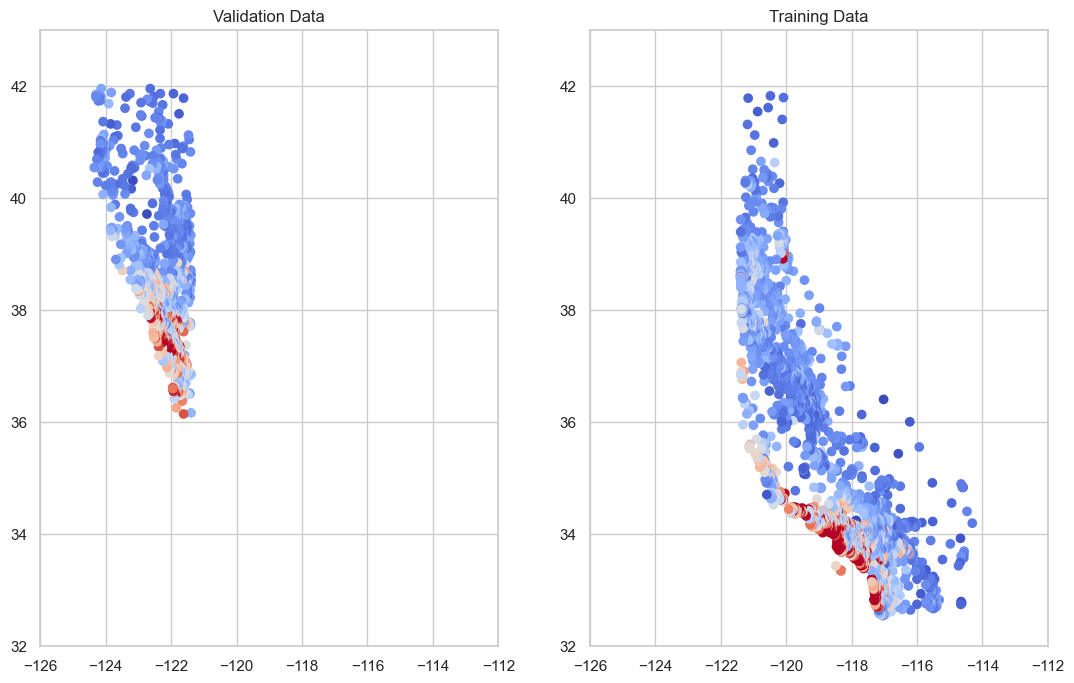

In [65]:
data_visualization(training_examples, validation_examples)
plt.show()

# **Q12. que constatez-vous ? écrire votre interprétation.**

Il y a une concentration de maisons chères en une petite région, surement une ville ou une région propice à la vie.

# **Q12. adapter vos données et visualiser de nouveau**

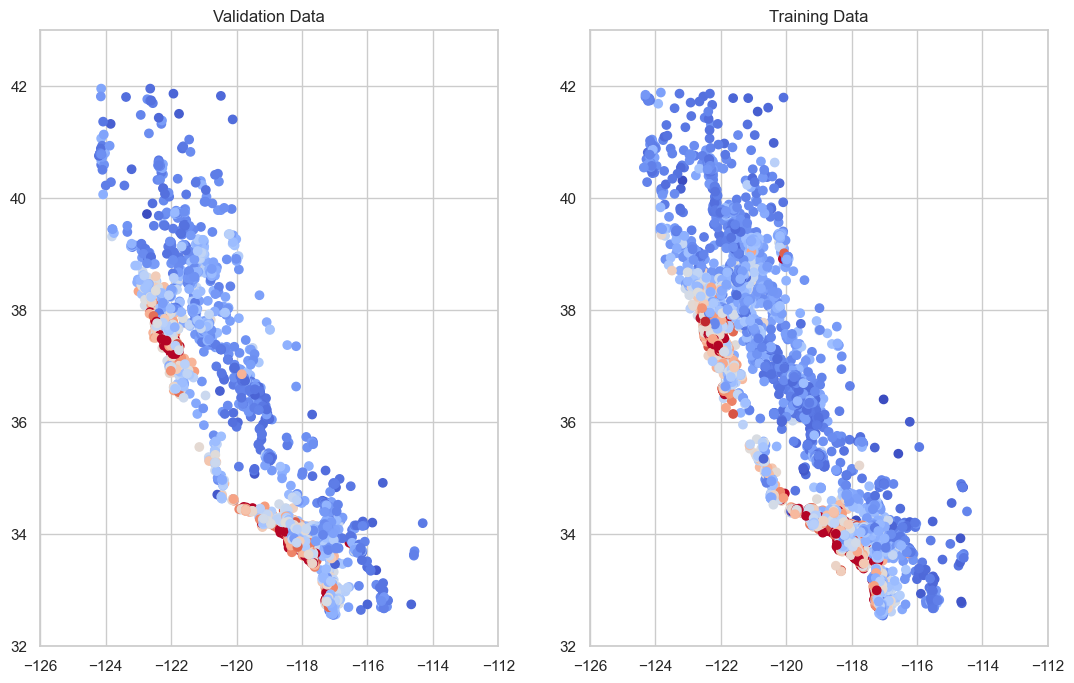

In [71]:
df_processed_features = df_processed_features.sample(frac=1).reset_index(drop=True)
data_visualization(df_processed_features.head(12000), df_processed_features.tail(5000))

# **Q13. Appliquer la méthode de corrélation « Pearson » sur les données.**

<Axes: >

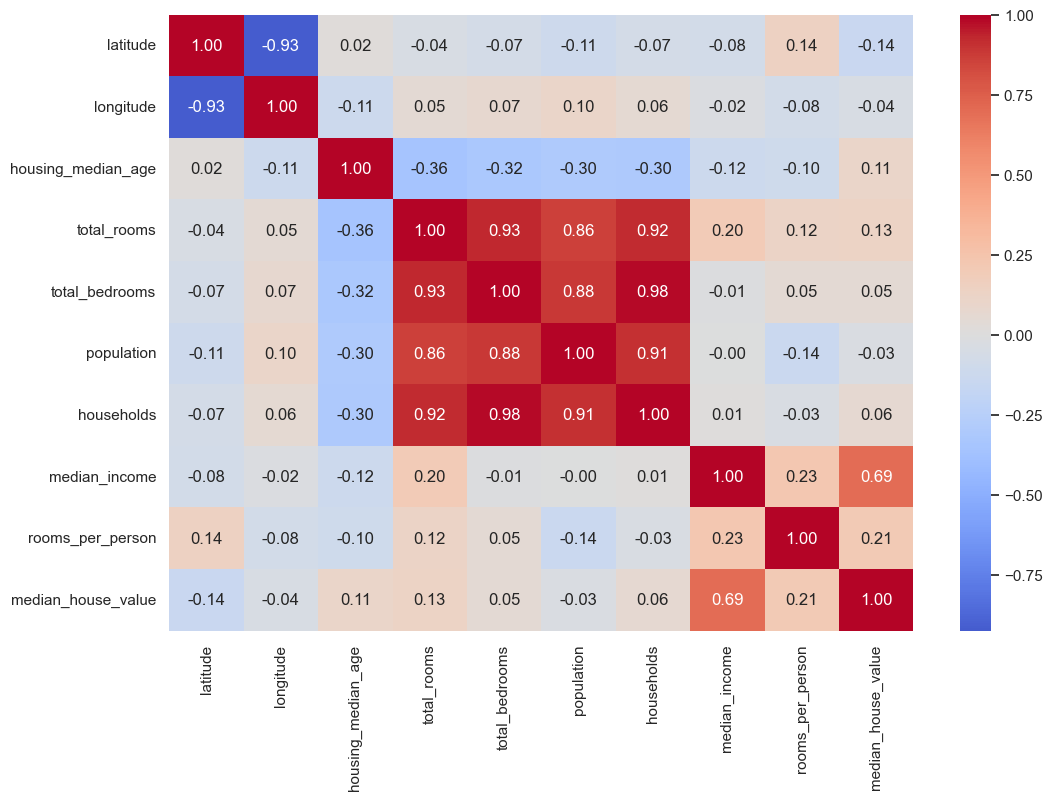

In [72]:
plt.figure(figsize=(12, 8))
corr_matrix = df_processed_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)

# **Q14. Interpréter vos résultats**

????????????????????????????????????????????????????

# **Q15. Afficher la distribution de la cible "median_house_value" avec sns.distplot.**

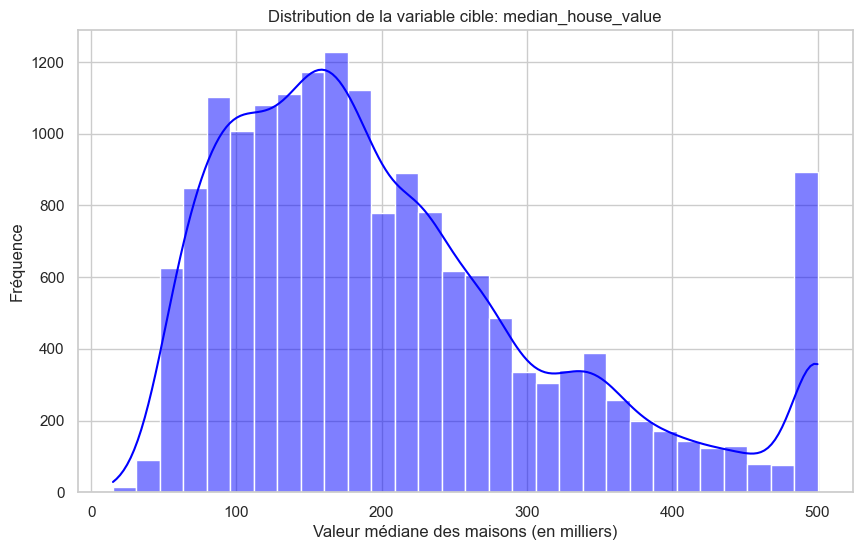

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df_processed_features["median_house_value"], kde=True, bins=30, color='blue')
plt.title("Distribution de la variable cible: median_house_value")
plt.xlabel("Valeur médiane des maisons (en milliers)")
plt.ylabel("Fréquence")
plt.show()

# **Q16. Afficher le classement des valeurs corrélés avec la cible "median house value"**

In [81]:
corr_target = corr_matrix["median_house_value"].sort_values(ascending=False)
print("Classement décroissant des corrélations avec median_house_value :\n")
print(corr_target)

Classement décroissant des corrélations avec median_house_value :

median_house_value    1.000000
median_income         0.691871
rooms_per_person      0.206969
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64


# **Q17. Visualiser les données sur la carte avec la fonction visualize_on_map**

In [93]:
import folium
import branca.colormap
def visualize_on_map(data, data_split):

    # Define the map centered within the dataset's latitude and longitude range
    m = folium.Map(location=[37.166773, -120.436393], tiles="OpenStreetMap", zoom_start=6)

    # Define a colormap based on the median house value
    colormap = branca.colormap.LinearColormap(colors=['blue', 'red'], index=[0, 1], vmin=0, vmax=1)

    # Add validation data points to the map
    for i in range(len(housing)):
        folium.Circle(
            location=[housing.iloc[i]['latitude'], housing.iloc[i]['longitude']],
            radius=10,
            color=colormap(housing.iloc[i]["median_house_value"] / housing["median_house_value"].max())
        ).add_to(m)

    # Add a title
    loc = data_split
    title_html = '''
                <h3 align="center" style="font-size:16px"><b>{}</b></h3>
                '''.format(loc)
    m.get_root().html.add_child(folium.Element(title_html))

    return m


In [ ]:
visualize_on_map(training_examples, training_examples)